In [1]:
import pandas as pd

In [22]:
ratings = pd.read_csv("ratings.csv")

In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


# test
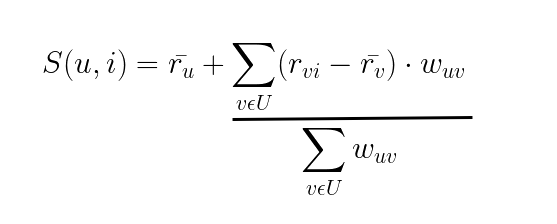


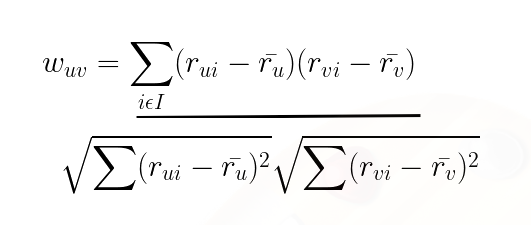

Need to calculate the average rating for every user

In [24]:
# mean = ratings.groupby("userId")["rating"].mean()

In [27]:
# ratings = ratings.join(mean, on="userId", rsuffix="_avg")

In [28]:
# ratings.head()

,userId,movieId,rating,timestamp,rating_avg
0,1,2,3.5,1112486027,3.742857
1,1,29,3.5,1112484676,3.742857
2,1,32,3.5,1112484819,3.742857
3,1,47,3.5,1112484727,3.742857
4,1,50,3.5,1112484580,3.742857


In [32]:
ratings_matrix = pd.pivot_table(ratings, values='rating', index='userId', columns='movieId')

In [34]:
# Replacing NaN by average rating for the movie
# ratings_matrix = ratings_matrix.fillna(ratings_matrix.mean(axis=0), inplace=True)

In [35]:
for i in ratings_matrix.columns[ratings_matrix.isnull().any(axis=0)]:
    ratings_matrix[i].fillna(ratings_matrix[i].mean(), inplace=True)

In [36]:
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,129350,129354,129428,129707,130052,130073,130219,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,3.959323,3.500000,3.186861,3.0,3.143836,3.836508,3.381429,3.352564,3.017327,3.427003,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0
2,3.959323,3.268398,4.000000,3.0,3.143836,3.836508,3.381429,3.352564,3.017327,3.427003,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0
3,4.000000,3.268398,3.186861,3.0,3.143836,3.836508,3.381429,3.352564,3.017327,3.427003,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0
4,3.959323,3.268398,3.186861,3.0,3.143836,3.000000,3.381429,3.352564,3.017327,4.000000,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0
5,3.959323,3.000000,3.186861,3.0,3.143836,3.836508,3.381429,3.352564,3.017327,3.427003,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,4.000000,3.268398,3.186861,3.0,3.500000,3.836508,3.381429,3.352564,3.017327,3.427003,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0
7117,4.000000,3.268398,4.000000,3.0,3.143836,5.000000,3.000000,3.352564,1.000000,3.000000,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0
7118,3.959323,3.268398,3.186861,3.0,3.143836,3.836508,3.381429,3.352564,3.017327,3.427003,...,3.5,3.5,3.25,0.5,1.0,2.5,4.5,4.0,2.25,3.0


In [ ]:
# similarity_matrix = 

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
similarity_matrix = cosine_similarity(ratings_matrix)

In [ ]:
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=ratings_matrix.index, columns=ratings_matrix.index)

In [41]:
similarity_matrix_df

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.999601,0.999223,0.999773,0.999576,0.999748,0.999252,0.999658,0.999737,0.999805,...,0.999532,0.999803,0.999500,0.999785,0.999733,0.999450,0.999239,0.999734,0.999748,0.999760
2,0.999601,1.000000,0.999232,0.999708,0.999554,0.999696,0.999240,0.999640,0.999678,0.999732,...,0.999489,0.999741,0.999458,0.999719,0.999640,0.999392,0.999192,0.999717,0.999711,0.999697
3,0.999223,0.999232,1.000000,0.999316,0.999149,0.999285,0.998815,0.999214,0.999289,0.999333,...,0.999100,0.999358,0.999046,0.999328,0.999235,0.998979,0.998798,0.999313,0.999332,0.999308
4,0.999773,0.999708,0.999316,1.000000,0.999699,0.999839,0.999351,0.999779,0.999835,0.999889,...,0.999638,0.999899,0.999643,0.999876,0.999810,0.999514,0.999341,0.999843,0.999825,0.999851
5,0.999576,0.999554,0.999149,0.999699,1.000000,0.999679,0.999214,0.999597,0.999650,0.999701,...,0.999480,0.999712,0.999554,0.999693,0.999651,0.999328,0.999224,0.999638,0.999674,0.999678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,0.999450,0.999392,0.998979,0.999514,0.999328,0.999482,0.999043,0.999440,0.999491,0.999544,...,0.999312,0.999558,0.999227,0.999529,0.999460,1.000000,0.999040,0.999488,0.999504,0.999515
7117,0.999239,0.999192,0.998798,0.999341,0.999224,0.999306,0.998865,0.999269,0.999304,0.999381,...,0.999136,0.999354,0.999114,0.999342,0.999267,0.999040,1.000000,0.999308,0.999316,0.999354
7118,0.999734,0.999717,0.999313,0.999843,0.999638,0.999826,0.999323,0.999748,0.999816,0.999864,...,0.999620,0.999878,0.999559,0.999856,0.999784,0.999488,0.999308,1.000000,0.999834,0.999831
